<a href="https://colab.research.google.com/github/RuthvikDacha/Machine-Learning-Projects/blob/main/House_Price_Prediction_%26_Feature_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# File path to the dataset
file_path = '/content/drive/MyDrive/House Price Prediction & Feature Impact Analysis/Real estate.csv'

# Check if the file exists
import os
print("File exists:", os.path.exists(file_path))

# Load the dataset into a Pandas DataFrame
import pandas as pd
data = pd.read_csv(file_path)

# Display the first few rows and dataset shape
print(data.head())
print("Dataset shape:", data.shape)


Mounted at /content/drive
File exists: True
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                 

In [ ]:
# Rename columns for better readability
data.columns = [
    "ID", "Transaction_Date", "House_Age",
    "Distance_to_MRT", "Convenience_Stores",
    "Latitude", "Longitude", "Price_per_Unit_Area"
]

# Convert Transaction_Date to a datetime format and extract year
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], format='%Y.%f', errors='coerce')
data['Transaction_Year'] = data['Transaction_Date'].dt.year

# Remove outliers from the Price_per_Unit_Area column using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = remove_outliers(data, 'Price_per_Unit_Area')

# Create distance categories
import numpy as np
data['Distance_Category'] = pd.cut(
    data['Distance_to_MRT'],
    bins=[0, 500, 1000, 3000, 5000, np.inf],
    labels=['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']
)

# Save the cleaned dataset
processed_file_path = '/content/drive/MyDrive/House Price Prediction & Feature Impact Analysis/Processed_Real_Estate.csv'
data.to_csv(processed_file_path, index=False)
print("Processed data saved at:", processed_file_path)


Processed data saved at: /content/drive/MyDrive/House Price Prediction & Feature Impact Analysis/Processed_Real_Estate.csv


<ipython-input-2-833b4a2ec6b2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance_Category'] = pd.cut(


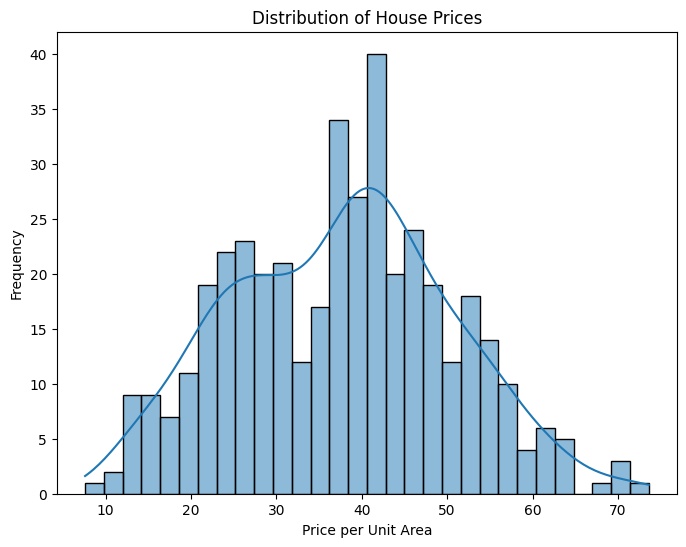

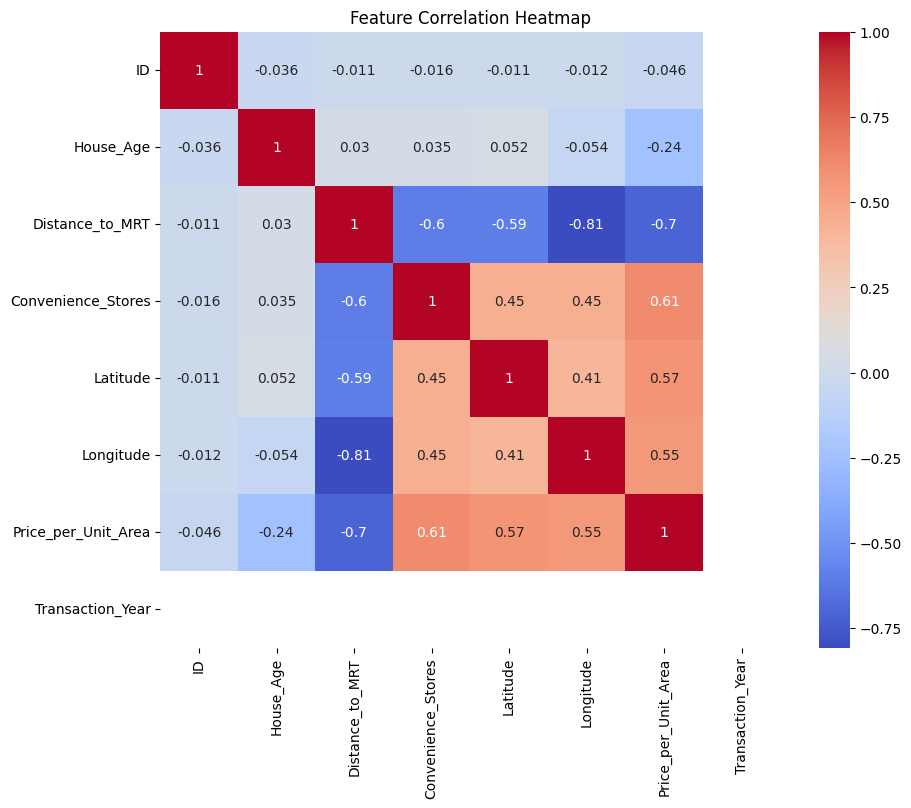

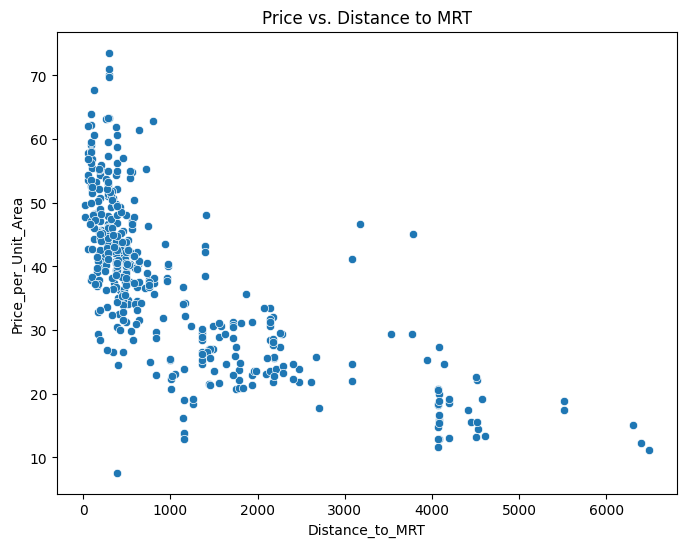

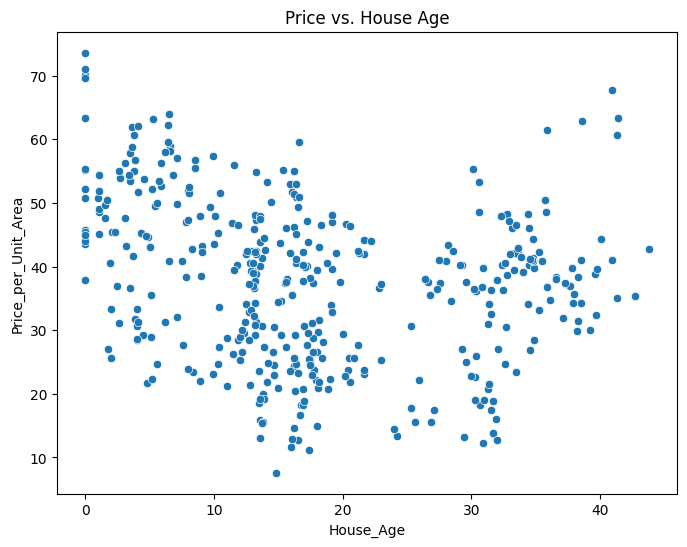

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot house price distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Price_per_Unit_Area'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price per Unit Area')
plt.ylabel('Frequency')
plt.show()

# Plot feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Scatter plots for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance_to_MRT', y='Price_per_Unit_Area', data=data)
plt.title('Price vs. Distance to MRT')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='House_Age', y='Price_per_Unit_Area', data=data)
plt.title('Price vs. House Age')
plt.show()


In [ ]:
# Define features and target
X = data[["House_Age", "Distance_to_MRT", "Convenience_Stores", "Latitude", "Longitude"]]
y = data["Price_per_Unit_Area"]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print("Random Forest - MAE:", rf_mae, "RMSE:", rf_rmse)

# Train and evaluate Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_y_pred = gbr_model.predict(X_test)
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_y_pred))
print("Gradient Boosting - MAE:", gbr_mae, "RMSE:", gbr_rmse)

# Train and evaluate XGBoost
!pip install xgboost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
print("XGBoost - MAE:", xgb_mae, "RMSE:", xgb_rmse)


Random Forest - MAE: 5.160838433821868 RMSE: 7.493546944699846
Gradient Boosting - MAE: 5.051643828070568 RMSE: 7.540687074620275
XGBoost - MAE: 5.76678380851286 RMSE: 8.241526329641136


In [ ]:
# Save Random Forest predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_y_pred})
results.to_csv('/content/drive/MyDrive/House Price Prediction & Feature Impact Analysis/predictions.csv', index=False)

# Save feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
importances.to_csv('/content/drive/MyDrive/House Price Prediction & Feature Impact Analysis/feature_importances.csv', index=False)
